<a href="https://colab.research.google.com/github/FarnazG/Machine_Learning/blob/main/Train_neural_network_basic_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train neural network: basic classification

This notebook uses tf.keras, a high-level API to build and train models in TensorFlow.
[Source](https://https://github.com/tensorflow/docs/blob/master/site/en/r1/tutorials/keras/basic_classification.ipynb)

In [1]:
# TensorFlow and tf.keras
import tensorflow.compat.v1 as tf

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# Import the Fashion MNIST dataset
The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

**about dataset:**
Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing we'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

**source:**
[Fashion-MNIST](https://https://github.com/zalandoresearch/fashion-mnist)

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Note:** Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explor and Preprocess the Data
**The format of the dataset :** The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
#There are 60,000 labels in the training set
len(train_labels)

60000

In [6]:
#Each label is an integer between 0 and 9:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:
len(test_labels)

10000

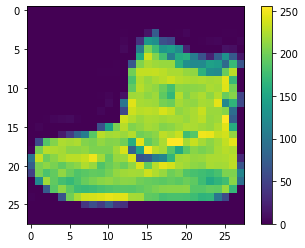

In [8]:
#The test set contains 10,000 images labels.
#scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255.
#It's important that the training set and the testing set are preprocessed in the same way:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#The pixel values fall in the range of 0 to 255
train_images = train_images / 255.0

test_images = test_images / 255.0

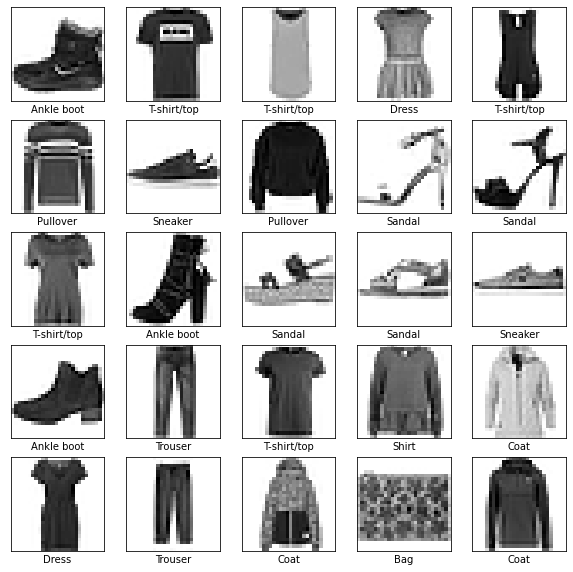

In [10]:
#Display the first 25 images from the training set and display the class name below each image. 
#Verify that the data is in the correct format and we're ready to build and train the network.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

In [11]:
# set up the layers:
#The basic building block of a neural network is the layer.Layers extract representations from the data fed into them.
#These representations are more meaningful for the problem at hand.Most of deep learning consists of chaining together simple layers. 
#Most layers, like tf.keras.layers.Dense, have parameters that are learned during training.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

# **Compile the model**
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [12]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Train the model**
Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.
The model learns to associate images and labels.
We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.
To start training, call the model.fit method—the model is "fit" to the training data:

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4946 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3726 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8916


In [14]:
# evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3893 - accuracy: 0.8625
Test accuracy: 0.862500011920929



It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

# Make predictions

In [15]:
predictions = model.predict(test_images)

In [16]:
#The model has predicted the label for each image in the testing set. Let's take a look at the first prediction:
predictions[0]

array([1.0657060e-05, 1.5082022e-06, 2.2121922e-07, 3.1174920e-08,
       4.6900432e-06, 2.4706326e-02, 2.6873768e-06, 3.5620540e-02,
       2.0321847e-04, 9.3945009e-01], dtype=float32)

In [17]:
#A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds 
#to each of the 10 different articles of clothing. We can see which label has the highest confidence value:
np.argmax(predictions[0])

9

In [18]:
#So the model is most confident that this image is an ankle boot, or class_names[9]. 
#And we can check the test label to see this is correct:
test_labels[0]

9

In [19]:
#look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

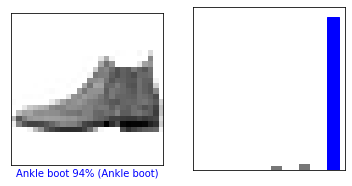

In [20]:
# look at the 0th image, predictions, and prediction array
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

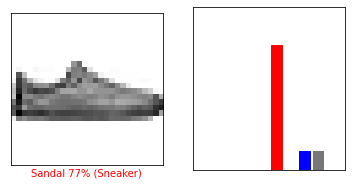

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

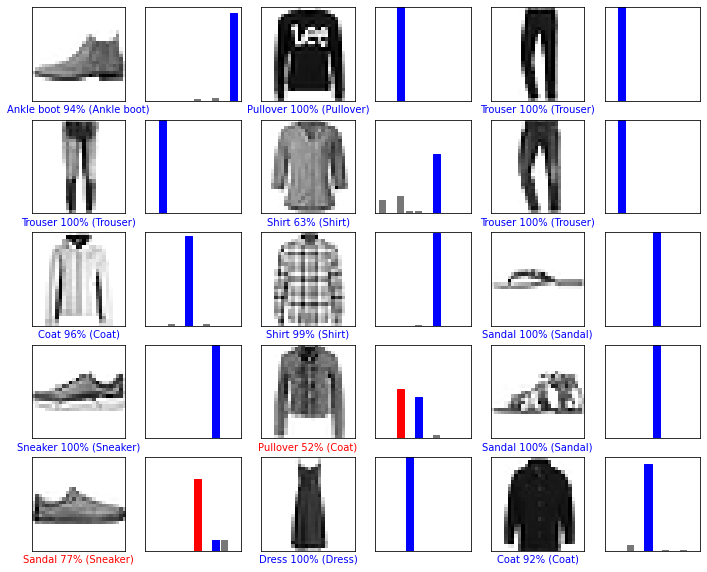

In [22]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [23]:
#Finally, use the trained model to make a prediction about a single image.
#Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


In [24]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
#So even though we're using a single image, we need to add it to a list:
#Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [25]:
#Now predict the image:
predictions_single = model.predict(img)

print(predictions_single)

[[9.9108706e-07 3.7640828e-12 9.9937302e-01 3.5463767e-08 1.2283356e-04
  3.5535692e-11 5.0318550e-04 3.9773396e-16 6.2272609e-10 5.3772437e-17]]


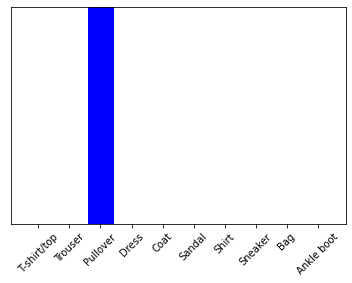

In [26]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [27]:
#model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

2


And the model predicts a label of 2.